In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

## Loss Functions

In this assignment, we will learn about loss functions. We will use a create a neural network and measure the model's performance using different loss functions.

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

tf.debugging.set_log_device_placement(True)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_rows", 100)

<IPython.core.display.Javascript object>

In [3]:
housing = pd.read_csv("data/housing.csv")

<IPython.core.display.Javascript object>

In [4]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<IPython.core.display.Javascript object>

We will use the dataset above to predict housing prices using various features about each house. Our first step is to check for missing data. 

In [5]:
# Answer below:

missing = housing.isna().mean()

<IPython.core.display.Javascript object>

Remove columns that contain more than 30% of missing data. After removing those columns, remove the rows that contain at least one observation that is missing.

In [6]:
# Answer below:
drop_cols = missing[missing > 0.3].index

housing = housing.drop(drop_cols, 1)

<IPython.core.display.Javascript object>

In [7]:
housing = housing.dropna()

<IPython.core.display.Javascript object>

In [8]:
housing.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500


<IPython.core.display.Javascript object>

There are some categorical variables that contain numeric data and some that do not. Print the type of each column to first see whether there is an issue with misclassification of column type.

In [9]:
housing["MSSubClass"].value_counts()

20     411
60     227
50     114
120     66
160     53
70      52
30      47
80      37
90      24
190     19
85      13
75      13
45       9
180      6
40       3
Name: MSSubClass, dtype: int64

<IPython.core.display.Javascript object>

In [10]:
# Answer below:
housing.dtypes


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


<IPython.core.display.Javascript object>

We see that month sold and year sold are not variables that describe a feature of the house. While they do have relevance if we create a model containing a time series element, we will not include them here. Drop these columns. Also, remove the id column

In [11]:
# Answer below
housing = housing.drop(['Id', 'MoSold', 'YrSold'],1)


<IPython.core.display.Javascript object>

Using the information about the column types, identify all the variables that will be converted into dummy variables. Include at least one numeric variable that you think should be converted as well.

In [12]:
cat_cols = list(housing.select_dtypes("object").columns)

cat_cols.append("MSZoning")

<IPython.core.display.Javascript object>

Convert the columns you selected above into dummy variables

In [13]:
# Answer below:
# housing_cat = housing[cat_cols]

h_dummy = pd.get_dummies(housing, columns=cat_cols, drop_first=True)


<IPython.core.display.Javascript object>

Split the data into train and test with 20% of data in test.

In [14]:
from sklearn.model_selection import train_test_split

<IPython.core.display.Javascript object>

In [15]:
# Answer below
X = h_dummy.drop("SalePrice", 1)
y = np.array(housing["SalePrice"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=34
)

<IPython.core.display.Javascript object>

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# X_train = pd.DataFrame(scaler.fit_transform(X_train))
# X_test = pd.DataFrame(scaler.transform(X_test))

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<IPython.core.display.Javascript object>

Create a model with 5 layers. The first layer should be a dense layer that takes in the input, the last layer should be of size 1. You determine the remaining layer sizes.

Use a linear activation for the output layer.

In [17]:
# Answer below
model = Sequential()

model.add(Dense(128, input_dim=X.shape[1], activation="relu"))

model.add(Dense(64, activation="relu"))

model.add(Dense(32, activation="relu"))

model.add(Dense(16, activation="relu"))

model.add(Dense(1, activation="linear"))

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/tas

<IPython.core.display.Javascript object>

Compile the model with the RMSprop optimizer and mean square error loss. Use the MSE as a metric. Set batch size to 100 and epochs to 200. Fit the model and report the results.

In [18]:
# Answer below:
model.compile(loss = 'mean_squared_error', optimizer='adam', metrics = ['mse'])


Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


<IPython.core.display.Javascript object>

In [19]:
history = model.fit(
    X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=200
)

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Te

875/875 [==============================] - 0s 42us/sample - loss: 2596383967.0857 - mse: 2596383744.0000 - val_loss: 2711117603.0685 - val_mse: 2711117824.0000
Epoch 65/200
875/875 [==============================] - 0s 38us/sample - loss: 2558685465.6000 - mse: 2558685440.0000 - val_loss: 2672890887.0137 - val_mse: 2672890880.0000
Epoch 66/200
875/875 [==============================] - 0s 40us/sample - loss: 2523225797.4857 - mse: 2523225600.0000 - val_loss: 2634120409.4247 - val_mse: 2634120448.0000
Epoch 67/200
875/875 [==============================] - 0s 41us/sample - loss: 2490333611.8857 - mse: 2490333696.0000 - val_loss: 2590790308.8219 - val_mse: 2590790400.0000
Epoch 68/200
875/875 [==============================] - 0s 35us/sample - loss: 2454104846.6286 - mse: 2454104832.0000 - val_loss: 2558798800.6575 - val_mse: 2558798848.0000
Epoch 69/200
875/875 [==============================] - 0s 38us/sample - loss: 2422624877.7143 - mse: 2422625024.0000 - val_loss: 2517410019.9452 - 

875/875 [==============================] - 0s 38us/sample - loss: 1134482121.1429 - mse: 1134482048.0000 - val_loss: 1085078520.9863 - val_mse: 1085078528.0000
Epoch 159/200
875/875 [==============================] - 0s 38us/sample - loss: 1128329095.3143 - mse: 1128329088.0000 - val_loss: 1088903453.2237 - val_mse: 1088903424.0000
Epoch 160/200
875/875 [==============================] - 0s 38us/sample - loss: 1124487208.2286 - mse: 1124487168.0000 - val_loss: 1094878817.3151 - val_mse: 1094878848.0000
Epoch 161/200
875/875 [==============================] - 0s 38us/sample - loss: 1121193030.4000 - mse: 1121193088.0000 - val_loss: 1077281354.5205 - val_mse: 1077281408.0000
Epoch 162/200
875/875 [==============================] - 0s 38us/sample - loss: 1115263401.1429 - mse: 1115263360.0000 - val_loss: 1079330507.9817 - val_mse: 1079330432.0000
Epoch 163/200
875/875 [==============================] - 0s 38us/sample - loss: 1112079385.6000 - mse: 1112079360.0000 - val_loss: 1070557378.33

<IPython.core.display.Javascript object>

<AxesSubplot:>

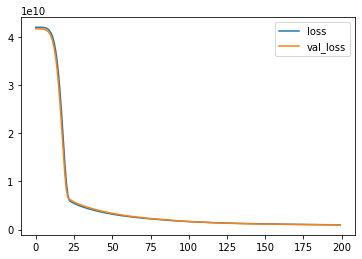

<IPython.core.display.Javascript object>

In [20]:
df = pd.DataFrame(history.history)

df[["loss", "val_loss"]].plot()

Next, do the same but with mean absolute error loss. Use both MSE and MAE as metrics. Compare the results.

In [21]:
model = Sequential()

model.add(Dense(128, input_dim=X.shape[1], activation="relu"))

model.add(Dense(64, activation="relu"))

model.add(Dense(32, activation="relu"))

model.add(Dense(16, activation="relu"))

model.add(Dense(1, activation="linear"))

<IPython.core.display.Javascript object>

In [22]:
# Answer below:
model.compile(loss = 'mean_absolute_error', optimizer='adam', metrics = ['mse', 'mae'])


<IPython.core.display.Javascript object>

In [23]:
history = model.fit(
    X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=200
)

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Train on 875 samples, validate on 219 samples
Epoch 1/200
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:loca

875/875 [==============================] - 0s 40us/sample - loss: 28666.8111 - mse: 2538355456.0000 - mae: 28666.8145 - val_loss: 28097.4664 - val_mse: 2695168000.0000 - val_mae: 28097.4648
Epoch 63/200
875/875 [==============================] - 0s 40us/sample - loss: 28322.4084 - mse: 2494517760.0000 - mae: 28322.4082 - val_loss: 27817.4965 - val_mse: 2710683392.0000 - val_mae: 27817.4980
Epoch 64/200
875/875 [==============================] - 0s 41us/sample - loss: 28064.4826 - mse: 2473788160.0000 - mae: 28064.4824 - val_loss: 27579.1005 - val_mse: 2640122880.0000 - val_mae: 27579.0996
Epoch 65/200
875/875 [==============================] - 0s 41us/sample - loss: 27809.1843 - mse: 2397599744.0000 - mae: 27809.1836 - val_loss: 27351.6093 - val_mse: 2574391808.0000 - val_mae: 27351.6094
Epoch 66/200
875/875 [==============================] - 0s 41us/sample - loss: 27590.4498 - mse: 2378535936.0000 - mae: 27590.4512 - val_loss: 27088.6267 - val_mse: 2577430016.0000 - val_mae: 27088.627

Epoch 142/200
875/875 [==============================] - 0s 41us/sample - loss: 17687.2647 - mse: 1135186176.0000 - mae: 17687.2637 - val_loss: 18395.7437 - val_mse: 1062150912.0000 - val_mae: 18395.7441
Epoch 143/200
875/875 [==============================] - 0s 40us/sample - loss: 17609.4429 - mse: 1132757376.0000 - mae: 17609.4414 - val_loss: 18336.3470 - val_mse: 1027753280.0000 - val_mae: 18336.3477
Epoch 144/200
875/875 [==============================] - 0s 39us/sample - loss: 17488.1520 - mse: 1122083712.0000 - mae: 17488.1504 - val_loss: 18327.8599 - val_mse: 1056812992.0000 - val_mae: 18327.8594
Epoch 145/200
875/875 [==============================] - 0s 40us/sample - loss: 17425.0753 - mse: 1116230528.0000 - mae: 17425.0723 - val_loss: 18204.6198 - val_mse: 1034436736.0000 - val_mae: 18204.6211
Epoch 146/200
875/875 [==============================] - 0s 40us/sample - loss: 17377.0743 - mse: 1122012288.0000 - mae: 17377.0762 - val_loss: 18163.8600 - val_mse: 1030784128.0000 - 

<IPython.core.display.Javascript object>

<AxesSubplot:>

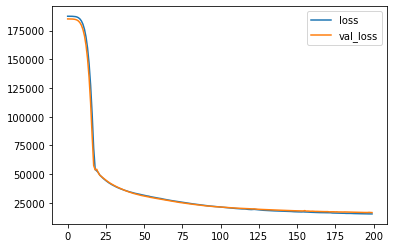

<IPython.core.display.Javascript object>

In [24]:
df = pd.DataFrame(history.history)

df[["loss", "val_loss"]].plot()

Finally, try your model using mean squared logarithmic error. Compare the results.

In [25]:
# Answer below:
model = Sequential()

model.add(Dense(128, input_dim=X.shape[1], activation="relu"))

model.add(Dense(64, activation="relu"))

model.add(Dense(32, activation="relu"))

model.add(Dense(16, activation="relu"))

model.add(Dense(1, activation="linear"))


<IPython.core.display.Javascript object>

In [26]:
model.compile?

<IPython.core.display.Javascript object>

In [27]:
# Answer below:
model.compile(loss = 'mean_squared_logarithmic_error', optimizer='adam', metrics = ['mse', 'mae'])


<IPython.core.display.Javascript object>

In [28]:
history = model.fit(
    X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=200
)

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Train on 875 samples, validate on 219 samples
Epoch 1/200
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp

875/875 [==============================] - 0s 41us/sample - loss: 3.0871 - mse: 31137228800.0000 - mae: 156454.7656 - val_loss: 2.9683 - val_mse: 30747662336.0000 - val_mae: 153547.4219
Epoch 63/200
875/875 [==============================] - 0s 41us/sample - loss: 2.9708 - mse: 30793820160.0000 - mae: 155376.6719 - val_loss: 2.8561 - val_mse: 30410764288.0000 - val_mae: 152465.1094
Epoch 64/200
875/875 [==============================] - ETA: 0s - loss: 3.0465 - mse: 32908689408.0000 - mae: 162931.40 - 0s 40us/sample - loss: 2.8596 - mse: 30453198848.0000 - mae: 154288.8281 - val_loss: 2.7485 - val_mse: 30072311808.0000 - val_mae: 151370.3594
Epoch 65/200
875/875 [==============================] - 0s 43us/sample - loss: 2.7526 - mse: 30106744832.0000 - mae: 153187.5625 - val_loss: 2.6456 - val_mse: 29733632000.0000 - val_mae: 150266.6875
Epoch 66/200
875/875 [==============================] - 0s 41us/sample - loss: 2.6506 - mse: 29763999744.0000 - mae: 152077.1406 - val_loss: 2.5468 - v

Epoch 103/200
875/875 [==============================] - 0s 42us/sample - loss: 0.7143 - mse: 17838196736.0000 - mae: 107119.9844 - val_loss: 0.6812 - val_mse: 17711464448.0000 - val_mae: 104244.4766
Epoch 104/200
875/875 [==============================] - 0s 40us/sample - loss: 0.6913 - mse: 17573273600.0000 - mae: 105906.3750 - val_loss: 0.6590 - val_mse: 17449785344.0000 - val_mae: 103043.4375
Epoch 105/200
875/875 [==============================] - 0s 42us/sample - loss: 0.6691 - mse: 17307363328.0000 - mae: 104697.7578 - val_loss: 0.6377 - val_mse: 17191643136.0000 - val_mae: 101850.0547
Epoch 106/200
875/875 [==============================] - 0s 43us/sample - loss: 0.6476 - mse: 17044239360.0000 - mae: 103493.2578 - val_loss: 0.6174 - val_mse: 16938815488.0000 - val_mae: 100672.9531
Epoch 107/200
875/875 [==============================] - 0s 40us/sample - loss: 0.6271 - mse: 16788304896.0000 - mae: 102303.0938 - val_loss: 0.5976 - val_mse: 16687781888.0000 - val_mae: 99490.8516
E

875/875 [==============================] - 0s 41us/sample - loss: 0.1183 - mse: 5922298368.0000 - mae: 50372.8398 - val_loss: 0.1222 - val_mse: 6290626560.0000 - val_mae: 51533.0195
Epoch 186/200
875/875 [==============================] - 0s 42us/sample - loss: 0.1181 - mse: 5914451456.0000 - mae: 50341.6055 - val_loss: 0.1220 - val_mse: 6281854464.0000 - val_mae: 51506.8359
Epoch 187/200
875/875 [==============================] - 0s 40us/sample - loss: 0.1180 - mse: 5906874368.0000 - mae: 50309.7188 - val_loss: 0.1219 - val_mse: 6275122688.0000 - val_mae: 51473.9766
Epoch 188/200
875/875 [==============================] - 0s 43us/sample - loss: 0.1178 - mse: 5899638272.0000 - mae: 50277.0312 - val_loss: 0.1217 - val_mse: 6267639808.0000 - val_mae: 51444.0703
Epoch 189/200
875/875 [==============================] - 0s 41us/sample - loss: 0.1176 - mse: 5893355520.0000 - mae: 50243.9805 - val_loss: 0.1216 - val_mse: 6262629888.0000 - val_mae: 51405.3242
Epoch 190/200
875/875 [===========

<IPython.core.display.Javascript object>

In [29]:
df = pd.DataFrame(history.history)

<IPython.core.display.Javascript object>

<AxesSubplot:>

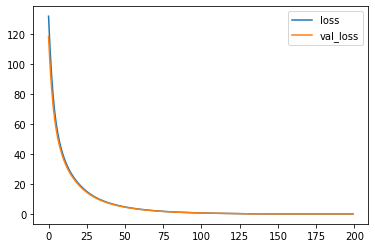

<IPython.core.display.Javascript object>

In [30]:
df[["loss", "val_loss"]].plot()